In [12]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

# generate random dataset

In [36]:
Xtr,ytr = make_moons(300, noise=0.25)
Xts,yts = make_moons(300, noise=0.25)

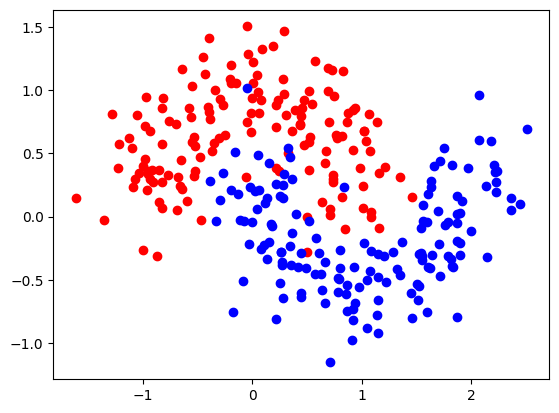

In [37]:
plt.scatter(Xtr[:,0][ytr==0], Xtr[:,1][ytr==0], color='red')
plt.scatter(Xtr[:,0][ytr==1], Xtr[:,1][ytr==1], color='blue')


# save dataset

In [38]:
Xtr.shape, ytr.shape

((300, 2), (300,))

In [39]:
pd.DataFrame(np.hstack([Xtr, ytr.reshape(-1,1)]), columns=['x0', 'x1', 'y']).to_csv("train_data.csv", index=False)

# save input data separate from target
pd.DataFrame(Xts, columns=['x0', 'x1']).to_csv("test_data_input.csv", index=False)
pd.DataFrame(yts.reshape(-1,1), columns=['y']).to_csv("test_data_target.csv", index=False)


# train model

In [40]:
m = RandomForestClassifier()
m.fit(Xtr,ytr)
print ("train score", m.score(Xtr, ytr))
print ("test score ", m.score(Xts, yts))


train score 1.0
test score  0.9333333333333333


# save model

In [42]:
with open("model.pkl", "wb") as f:
    pickle.dump(m, f)

# load model and test data from files

In [45]:
with open('model.pkl', 'rb') as f:
    _m = pickle.load(f)
    
_Xts = pd.read_csv("test_data_input.csv").values
_yts = pd.read_csv("test_data_target.csv").values


In [47]:
_m.predict(_Xts)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [48]:
_m.score(_Xts, _yts)

0.9333333333333333

In [49]:
z = pd.read_csv('train_data.csv').values
Xtr = z[:,:2]
ytr = z[:,-1]


In [50]:
m.fit(Xtr, ytr)

RandomForestClassifier()

In [52]:
m.score(Xts, yts)

0.9233333333333333